In [1]:
%pylab inline
import astropy.io.fits as pyfits
from configparser import ConfigParser

Populating the interactive namespace from numpy and matplotlib


In [29]:
parser=ConfigParser()
parser.read('config_lbd3.5_VVDS.ini')
xmin=parser.getfloat('transPlane','xmin')
ymin=parser.getfloat('transPlane','ymin')
scale=parser.getfloat('transPlane','scale')
nx=parser.getint('transPlane','nx')
ny=parser.getint('transPlane','ny')

xArray=np.arange(xmin,xmin+(nx-0.1)*scale,scale)
yArray=np.arange(ymin,ymin+(ny-0.1)*scale,scale)

zmin=parser.getfloat('lensZ','zlmin')
zscale=parser.getfloat('lensZ','zlscale')
nz=parser.getint('lensZ','nlp')
zArray= np.arange(zmin,zmin+(nz-0.1)*zscale,zscale)
Z,Y,X = np.meshgrid(zArray,yArray,xArray,indexing='ij')


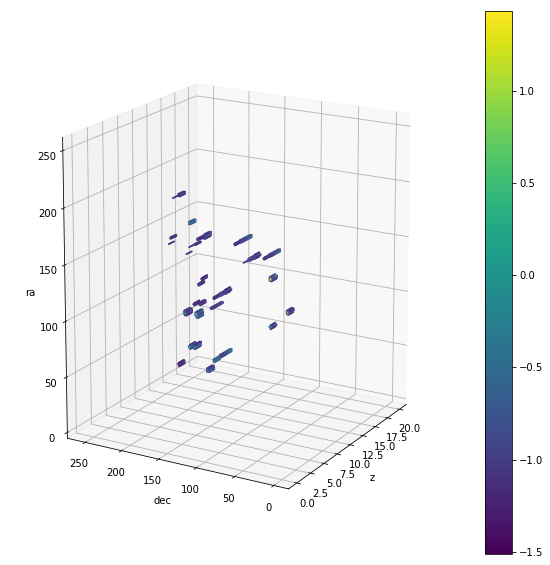

In [4]:
from mpl_toolkits.mplot3d import Axes3D

colorName='viridis'
ncolors = 256
color_array = plt.get_cmap(colorName)(range(ncolors))
# change alpha values
#color_array[:,-1] = np.linspace(0.,1.0,ncolors)
# create a colormap object
cmap = mpl.colors.LinearSegmentedColormap.from_list(name=colorName,colors=color_array)

delFname='deltaMap_lbd2.5_VVDS.fits'
ngrid=64
delta=pyfits.getdata(delFname)
norm=mpl.colors.Normalize(delta.min(),delta.max())
z,y,x= np.indices(tuple(np.array(delta.shape)+np.ones(3).astype(int)))
colors=cmap(delta)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(z,y,x,delta>.1,facecolors=colors)
ax.view_init(15, 210)
ax.set_xlabel('z')
ax.set_ylabel('dec')
ax.set_zlabel('ra')
mpb=mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
mpb.set_array(color_array)
plt.colorbar(mpb)
plt.savefig('3D_NFW_ShapeNoise.png')

In [3]:
mskMap=(np.sum(pyfits.getdata('nMap_VVDS.fits'),axis=0)>1.)
kappa=np.sum(delta,axis=0)
kappa[~mskMap]=-1.
kapFname='kap'+delFname[5:]
pyfits.writeto(kapFname,kappa)

NameError: name 'delta' is not defined

In [4]:
from mayavi import mlab
%gui qt

In [30]:
delFname='deltaMap_lbd2.5_VVDS.fits'
ngrid=64
delta=pyfits.getdata(delFname)
mlab.contour3d(Z,Y,X,delta+0.001, contours=5, transparent=True)

In [24]:
X.shape

(8, 256, 256)

In [25]:
Y.shape

(8, 256, 256)

In [26]:
Z.shape

(8, 256, 256)

In [27]:
delta.shape

(20, 256, 256)